## INTERMEDIATE STATISTICS/INTERMEDIATE STATISTICS PART 2 EXERCISE  ##
#### Exercise ####
#### Exercise 1
#### Task 1
##### Review the tasks that follow and import the packages required to complete them.
##### Set the working directory to data directory.
##### Load the"ChemicalManufacturingProcess.csv" from the data folder as 'cmp'.
#### Result:


In [1]:
import os
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt

!pip install --upgrade scipy



home_dir = Path(".").resolve()
main_dir = Path(os.getcwd()).parent
print(main_dir)

if(main_dir != '/home/jovyan/TEDS-Jul2022/2/data'):
    data_dir = str(main_dir) + "/data"
print(data_dir)

os.chdir(data_dir)
df = pd.read_csv("ChemicalManufacturingProcess.csv").set_index('id')


  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
/home/jovyan/TEDS-Jul2022
/home/jovyan/TEDS-Jul2022/data


#### Task 2
##### Calculate the mean of the `Yield` variable and save it to `sample_yield_mean`.
##### Then, calculate the standard error of the sample deviation, and save it to a variable `sample_yield_sd`. 
##### Calculate the t-value of our yield sample mean where the population average yield is 40.44. 
##### Save this t-value as `t_value_41`.
#### Result:


In [2]:
# function gets the mean, std, and sample size from the df
# function also takes input for average value

# function returns sample's mean, standard error, and t_value

def get_mean_se(df,pop_avg):
    sample_mean = df['Yield'].mean()
    sample_std = df['Yield'].std(ddof = 1)
    sample_size = df['Yield'].shape[0]
    
    sample_se = sample_std/np.sqrt(sample_size)
    t_val = (sample_mean - pop_avg)/(sample_se)
    
    return sample_mean, sample_se, t_val

In [3]:
sample_yield_mean, sample_yield_sd, t_value_41 = get_mean_se(df,40.44)

In [4]:
t_value_41

-1.8937714023179801

#### Task 3
##### Using the t-table and then the stats.t.cdf() function in Python, calculate the probability of observing a sample as extreme or greater, given our assumption that the population mean yield is 40.44.
#### Result:


In [5]:
# using stats library to get probability of observing a sample as extreme or greatert than the sample average that was originally inputted

print(stats.t.cdf(t_value_41, df = df['Yield'].shape[0] - 1))

0.02995265149715128


#### Task 4
##### We are going to conduct a one-sample t-test at the alpha = 0.05 level. 
##### Assume a recent manufacturer has claimed the average population `yield` is 40.5.
##### Our belief is that the average population `yield` is less than 40.5, and we will conduct our test in hopes to prove so.
##### What is our null and alternative hypothesis?
##### Define the null hypothesis and alpha-level as `mean_yield_ho` and `alpha` respectively.
#### Result:


In [6]:
from scipy.stats import norm

mean_yield_ho = 0.05
a = 0.05
yield_val = 40.5

null_h = 'avg population yield value not be less than 40.5'
alt_h = 'avg population yield will be less than 40.5'

z = norm.ppf(a)



#### Task 5
##### Calculate the mean of the `yield` variable and save it to `sample_yield_mean`.
##### Then, calculate the standard error of the sample deviation, and save it to a variable `yield_se`. 
#### Result:


In [7]:
# finding the mean and se of the yield column
sample_yield_mean, yield_se, t_val = get_mean_se(df,yield_val)
print(sample_yield_mean)
print(yield_se)


40.17653409090909
0.1391223400925942


#### Task 6
##### Calculate the t-score of the above yield sample mean and the associated p-value.
##### What is our conclusion of this one-sample t-test?
#### Result:


In [8]:
# getting the p_value

print('tscore:',t_val)
p_val = stats.t.cdf(t_val, df = df['Yield'].shape[0] - 1)
print('pval:',p_val)

tscore: -2.3250464941549107
pval: 0.010608520252434474


In [9]:
if(p_val < a):
    print(alt_h,'reject the null hypothesis')
else:
    print(null_h,'faill to reject the null hypothesis')

avg population yield will be less than 40.5 reject the null hypothesis


#### Exercise 2
#### Task 1
##### Conduct a paired t-test by comparing the first 88 observations in yield dataset to the second set of 88 observations at alpha = 0.10 level.
##### The prevailing assumption is that there is no difference between the two yield sets.
##### Our belief is that there does exist a difference in the two samples of observations, and we will conduct our test in hopes to prove so.
##### What is our null and alternative hypothesis?
##### Define the null hypothesis and alpha-level as `mean_yield_ho` and `alpha` respectively.
#### Result:


In [10]:
# function to do paired_t test 

# will return t_score, p_value, d_bar, standard error, and the appropriate hypothesis statement
def paired_t_test(df, size = 10, a=0.05, mean_H0 = 0):
    
    df.dropna()
    
    null_H = 'df_one is equivalent to df_two, do not reject null hypothesis'
    alt_H = 'df_one and df_two are different, reject null hypothesis'
    
    
    
    df_one= df['Yield'][0:size]
    df_two= df['Yield'][size:size*2].reset_index(drop = True)
    
    d = (df_one - df_two)
    
    d_bar = d.mean()
    
    s_d = np.std(d, ddof = 1)
    n_val = size - 1
    
    se = s_d/np.sqrt(n_val)
    t_score = (d_bar -mean_H0)/se
    
    p_val = stats.t.cdf(t_score,n_val)
    
    if(p_val < a/2):
        hyp = alt_H
    else:
        hyp = null_H
    
    
    
    return t_score,p_val,d_bar,se,hyp


#### Task 2
##### Save the average difference between first 88 observations and the second set of 88 observations in `d_yield_bar`. These become the two samples we wish to test.
##### Define the standard error `yield_se` for the above samples.
#### Result:


In [11]:
d_yield_bar = paired_t_test(df,size = 88, a=0.1)[2]

print('d_yield_bar',d_yield_bar)

yield_se = paired_t_test(df,size = 88, a=0.1)[3]

print('yield_se',yield_se)

d_yield_bar 1.294712643678161
yield_se 0.28133440378730085


#### Task 3
##### Calculate the t-score  and the associated p-value.
##### What is our conclusion of this one-sample t-test?
##### Hint: Divide alpha by two as it is a two-tailed test.
#### Result:


In [12]:
t_score =paired_t_test(df,size = 88, a=0.1)[0]
p_val = paired_t_test(df,size = 88, a=0.1)[1]
hyp = paired_t_test(df,size = 88, a=0.1)[4]

print(hyp)

df_one is equivalent to df_two, do not reject null hypothesis


#### Task 4
##### From the "cmp" dataframe, add a new variable `YieldLevel`, which has two levels:
##### `"Less" if 'Yield' variable is less than its mean (< 40.18)`, and 
##### `"More" otherwise(>= 40.18)`.
#### Result:


In [13]:
df['YieldLevel'] = df['Yield'].apply(lambda value: 'Less' if value < 40.18 else 'More')

#### Task 5
##### We wish to conduct a two-sample t-test at alpha = 0.10 level to compare the difference in ManufacturingProcess45 between the two `YieldLevel` independent  samples, "Less" and "More".
##### The prevailing assumption is that there is no difference between the ManufacturingProcess45 of the two independent samples.
##### Our belief is that there does exist a difference between the ManufacturingProcess45 of the two samples of observations, and we will conduct  our test in hopes to prove so.
##### What is our null and alternative hypothesis?
##### Define the null hypothesis and alpha-level as `mean_yield_ho` and `alpha` respectively.
#### Result:


In [14]:
mean_cmp_Ho = 0
alpha = 0.10

#### Task 6
##### Create two variables, `temp_less` and `temp_more`, as samples which contain observations for the two levels "Less" and "More" of `YieldLevel`.
##### Calculate the size of each sample and save it as `n_cmp` and `m_cmp` respectively.
#####  Then, calculate the sample deviation of each sample, and save it to a variable `less_sd` and `more_sd` respectively. 
#### Result:


In [15]:
temp_less = df[df['YieldLevel'] == 'Less']
temp_more = df[df['YieldLevel'] == 'More']

n_df = temp_less.shape[0]
m_df = temp_more.shape[0]

less_sd = temp_less['ManufacturingProcess45'].std(ddof = 1)
more_sd = temp_more['ManufacturingProcess45'].std(ddof = 1)

print(less_sd,more_sd)

0.47334900269306096 0.3058978834390693


#### Task 7
##### Calculate the average difference in the `ManufacturingProcess45` of the two independent samples `temp_less` and `temp_more`.
##### Then, calculate the pooled standard deviation, using the size and standard deviation of each sample calculated above.
#### Result:


In [16]:
diff_man_pro45 = temp_less['ManufacturingProcess45'].mean() - temp_more['ManufacturingProcess45'].mean()
print(f'Difference in means of sets: {diff_man_pro45}')



one = (n_df - 1) * (less_sd ** 2)
two = (m_df - 1) * (more_sd ** 2)

denom = m_df +n_df - 2
s_pooled = np.sqrt((one +two )/denom)

print(f'pooled standard deviation {s_pooled} ')



Difference in means of sets: -0.06184262038366217
pooled standard deviation 0.40689760424252036 


#### Task 8
##### Calculate the t-score  and the associated p-value.
##### What is our conclusion of this two-sample t-test?
##### Hint: Divide alpha by two as it is a two-tailed test.
#### Result:


In [17]:
t_score = stats.ttest_ind(temp_less['ManufacturingProcess45'],temp_more['ManufacturingProcess45'],equal_var = True)[0]
p_val = stats.ttest_ind(temp_less['ManufacturingProcess45'],temp_more['ManufacturingProcess45'],equal_var = True)[1]/2

## INTERMEDIATE STATISTICS/INTERMEDIATE STATISTICS PART 3 EXERCISE  ##
#### Exercise ####
#### Exercise 3
#### Task 1
##### Review the tasks that follow and import the packages required to complete them.
##### Set the working directory to data directory.
##### Load the"ChemicalManufacturingProcess.csv" from the data folder as 'cmp'.
#### Result:


In [18]:
# reading in the csv
cmp = pd.read_csv('ChemicalManufacturingProcess.csv')


#### Task 2
##### Suppose you conducted a drug trial on a group of animals and you hypothesized that the animals receiving the drug would show increased heart rates compared to those that did not receive the drug. 
##### You conduct the study and collect the following contingency table:


|             | Heart Rate Increased | Heart Rate Decreased | Total |
|-------------|----------------------|----------------------|-------|
| Treated     |                    36|                    14|     50|
| Not Treated |                    30|                    25|     55|
| Total       |                    66|                    39|    105|


##### The prevailing assumption is that the variables are independent of each other.
##### We believe there is a dependency between the two variables, and we will conduct our test in hopes of proving so.
##### What is our null and alternative hypothesis?
#### Result:


In [20]:
null_H = 'HR is independent of treatment'
alt_H = 'HR is not independent of treatment, reject the null hypothesis'

#### Task 3
##### Create a array for the contingency table above and save it as 'cont_table_ex', and view this array.
#### Result:


In [21]:
cont_table_ex = np.array([[36,14],[30,25]])

#### Task 4
##### Conduct a chi-square test for the contingency matrix 'cont_table_ex' at alpha = 0.05.
##### Print test statistics, p-value, dof and expected values.
##### What's your conclusion?
#### Result:


In [22]:
stat, p, dof, expected = stats.chi2_contingency(cont_table_ex)
print(f'test_statistics: {stat}')
print(f'p_value: {p}')
print(f'degrees of freedom: {dof}')
print(f'expected values: {expected}')

test_statistics: 2.710942466624286
p_value: 0.09966209595851808
degrees of freedom: 1
expected values: [[31.42857143 18.57142857]
 [34.57142857 20.42857143]]


#### Task 5
##### Define a variable named `Yield` to be equal to the `Yield` column in the cmp dataframe.
##### Create a histogram plot of `Yield` data with 4 bins to see its distribution.
##### You will conduct a chi-square test of normality to test the assumption that `yield` data is normally distributed.
##### What is our null and alternative hypothesis?
#### Result:


<AxesSubplot:>

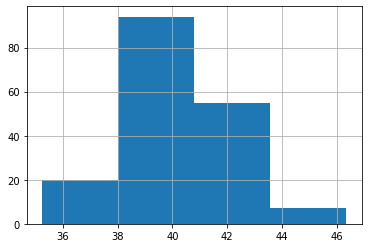

In [23]:
Yield = cmp['Yield']
Yield.hist(bins = 4)


#### Task 6
##### Cut `Yield` data into 4 bins and get the sorted value counts as `ob_bins`.
##### Assign the values from `ob_bins` as `ob_freq` and index as `bins`.
##### Calculate the mean and standard deviation of `Yield` and calculate the normal distribution.
##### Get the expected frequency as `ex_freq` and convert it into array.
#### Result:


In [27]:
ob_freq = pd.cut(Yield,bins=6 ).value_counts().sort_index().values
bins = pd.cut(Yield,bins=6 ).value_counts().sort_index().index

mean_val = Yield.mean()
std_val = Yield.std()

ex_freq = []
n_dist = stats.norm(mean_val,std_val) 
for i in bins:
# normal distribution
    lo = i.left
    hi = i.right
    freq = ((n_dist.cdf(hi)-n_dist.cdf(lo)))*len(Yield) 
    ex_freq.append(freq) 
    print(f'interval: {lo}--{hi}\t\tfreq: {freq}')

interval: 35.239--37.098		freq: 7.730921262232447
interval: 37.098--38.947		freq: 36.078278494822726
interval: 38.947--40.795		freq: 66.62860539333055
interval: 40.795--42.643		freq: 48.938855753859684
interval: 42.643--44.492		freq: 14.26078038000961
interval: 44.492--46.34		freq: 1.631463710984411


#### Task 7
##### Print `ob_freq` and `ex_freq` to compare the differences.
##### Conduct a chi-square test of normality at the alpha = 0.05 significance level to test
#####  the assumption that `yield` data is normally distributed.
##### What's your conclusion?
#### Result:


In [28]:
a = 0.05
concluded_val = stats.chisquare(ob_freq,ex_freq)

if concluded_val[1] < a:
        print('reject the null hypothesis:',alt_H)
else:
    print('fail to reject the null hypothesis:',null_H)


fail to reject the null hypothesis: HR is independent of treatment


## INTERMEDIATE STATISTICS/INTERMEDIATE STATISTICS PART 4 EXERCISE  ##
#### Exercise ####
#### Exercise 4
#### Task 1
##### Review the tasks that follow and import the packages required to complete them.
##### Set the working directory to data directory.
##### Load the"ChemicalManufacturingProcess.csv" from the data folder as 'cmp'.
#### Result:


In [29]:
cmp = pd.read_csv('ChemicalManufacturingProcess.csv')

#### Task 2
##### Back to our `cmp` dataframe, add a new variable `Yield_level`, which has two levels:


In [30]:
# `Less` if `Yield` variable is less than its mean (< 40.18)
# `More` otherwise(>= 40.18).
cmp['Yield_level'] = cmp['Yield'].apply(lambda value: 'Less' if value < 40.18 else 'More')


##### Check the first few rows of `cmp` dataframe.
#### Result:


In [31]:
cmp.head()

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45,id,Yield_level
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,3,7.2,NaN,NaN,11.6,3.0,1.8,2.4,1,Less
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2,2,More
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3,3,More
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1,4,More
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1,5,More


#### Task 3
##### The observations of levels `Less` and  `More` of the `Yield_level` variable become the two independent samples.
##### We want to check whether the variance of `ManufacturingProcess44` in these two independent samples are equal.
##### The prevailing assumption is that there is no difference between the variance of these two independent samples.
##### What is our null and alternative hypothesis?
#### Result:


In [32]:
null_H = 'std of each set of independent samples are the same'
alt_H = 'std of each set of independent samples are not the same'

#### Task 4
##### Subset the cmp data based on `Yield_level`, assign `ManufacturingProcess44` column with:


In [33]:
# subsetting yield_level for more and less and selecting the manufacturing process 44 column
yield_more = cmp[cmp['Yield_level'] == 'More']['ManufacturingProcess44']
yield_less = cmp[cmp['Yield_level'] == 'Less']['ManufacturingProcess44']

##### Calculate the f statistic by dividing the larger variance with lower variance and name it as `f_statistic`.
#### Result:


In [34]:
more_var = yield_more.var()
less_var = yield_less.var()

f_statistic = max(more_var,less_var)/min(more_var,less_var)
print(f'f_statistics: {f_statistic}')

f_statistics: 2.7754443748765314


#### Task 5
##### Conduct an f-test to check if the variance is equal between `ManufacturingProcess44` in more yield level and less yield level samples at alpha = 0.10 significance level. 
#### Result:


In [35]:
a = 0.1
# Calculate f_test

f_test = stats.f(dfd =len(yield_more)-1, dfn = len(yield_less)-1)

# Calculate p-value

p_value = 2*min(f_test.cdf(x = f_statistic), 1-f_test.cdf(x = f_statistic))
p_value

if(p_value < a):
    print('Since our p value is lower than the alpha value, we can reject the null hypothesis. There does exist a difference in variance in `ManufacturingProcess44` between the two independent samples.')
else:
    print('Since our p value is greater than the alpha value, we fail to reject the null hypothesis. There does not exist a difference in variance in `ManufacturingProcess44` between the two independent samples.')



Since our p value is lower than the alpha value, we can reject the null hypothesis. There does exist a difference in variance in `ManufacturingProcess44` between the two independent samples.
